In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)
import seaborn as sns

import mglearn

In [74]:
data = pd.read_csv('data/data_merge_real_final.csv', index_col=0)

In [75]:
data.head()

,Unnamed: 0.1,구별,순이동,총전입,총전출,아파트,종합,미분양 물량,아파트 매매량,1인당공원면적,교원1인당 학생(명),학원(개),대학교(개),의료기관(개),대형마트 및 백화점(개),박물관(개),구치소(개),화장시설(개),인구밀도
0,2007/01,강남구,302,12245,11943,79.261046,77.462003,0.0,192.0,10.0,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
1,2007/01,강동구,-31,8962,8993,77.900326,78.430109,0.0,251.0,6.5,20.20,1.5,0.0,9.8,16.0,0.0,0.0,0.0,19083.0
2,2007/01,강북구,-325,6737,7062,56.019419,60.985190,0.0,92.0,41.0,21.40,0.7,0.0,5.5,14.0,0.0,0.0,0.0,14772.0
3,2007/01,강서구,-49,10202,10251,72.591086,68.310941,0.0,225.0,6.0,19.82,1.0,1.0,5.1,19.0,1.0,0.0,0.0,13676.0
4,2007/01,관악구,649,11673,11024,70.128938,66.830897,0.0,132.0,19.6,18.41,0.8,1.0,3.5,26.0,2.0,0.0,0.0,18625.0


In [76]:
data.rename(columns={'Unnamed: 0.1':'날짜'}, inplace=True)

In [77]:
data.head()

,날짜,구별,순이동,총전입,총전출,아파트,종합,미분양 물량,아파트 매매량,1인당공원면적,교원1인당 학생(명),학원(개),대학교(개),의료기관(개),대형마트 및 백화점(개),박물관(개),구치소(개),화장시설(개),인구밀도
0,2007/01,강남구,302,12245,11943,79.261046,77.462003,0.0,192.0,10.0,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
1,2007/01,강동구,-31,8962,8993,77.900326,78.430109,0.0,251.0,6.5,20.20,1.5,0.0,9.8,16.0,0.0,0.0,0.0,19083.0
2,2007/01,강북구,-325,6737,7062,56.019419,60.985190,0.0,92.0,41.0,21.40,0.7,0.0,5.5,14.0,0.0,0.0,0.0,14772.0
3,2007/01,강서구,-49,10202,10251,72.591086,68.310941,0.0,225.0,6.0,19.82,1.0,1.0,5.1,19.0,1.0,0.0,0.0,13676.0
4,2007/01,관악구,649,11673,11024,70.128938,66.830897,0.0,132.0,19.6,18.41,0.8,1.0,3.5,26.0,2.0,0.0,0.0,18625.0


In [78]:
col1 = data.columns[2:5].to_list()
col2 = data.columns[5:7].to_list()
col3 = data.columns[7:].to_list()
col4 = data.columns[:2].to_list()
new_col = col4 + col2 + col1 + col3
data = data[new_col]

In [79]:
data.set_index('날짜', inplace=True)

In [91]:
col1 = data.columns[:2].to_list()
col2 = data.columns[3:].to_list()
new_col = col1 + col2
data1 = data[new_col]
data1.head()

,구별,아파트,순이동,총전입,총전출,미분양 물량,아파트 매매량,1인당공원면적,교원1인당 학생(명),학원(개),대학교(개),의료기관(개),대형마트 및 백화점(개),박물관(개),구치소(개),화장시설(개),인구밀도
날짜,,,,,,,,,,,,,,,,,
2007/01,강남구,79.261046,302,12245,11943,0.0,192.0,10.0,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
2007/01,강동구,77.900326,-31,8962,8993,0.0,251.0,6.5,20.20,1.5,0.0,9.8,16.0,0.0,0.0,0.0,19083.0
2007/01,강북구,56.019419,-325,6737,7062,0.0,92.0,41.0,21.40,0.7,0.0,5.5,14.0,0.0,0.0,0.0,14772.0
2007/01,강서구,72.591086,-49,10202,10251,0.0,225.0,6.0,19.82,1.0,1.0,5.1,19.0,1.0,0.0,0.0,13676.0
2007/01,관악구,70.128938,649,11673,11024,0.0,132.0,19.6,18.41,0.8,1.0,3.5,26.0,2.0,0.0,0.0,18625.0


In [98]:
data1.to_csv('data/data_merge_real_final.csv')

# 로드

In [5]:
df = pd.read_csv('data/data_merge_real_final.csv', index_col=0)
df.head()

,구별,아파트,순이동,총전입,총전출,미분양 물량,아파트 매매량,1인당공원면적,교원1인당 학생(명),학원(개),대학교(개),의료기관(개),대형마트 및 백화점(개),박물관(개),구치소(개),화장시설(개),인구밀도
날짜,,,,,,,,,,,,,,,,,
2007/01,강남구,79.261046,302,12245,11943,0.0,192.0,10.0,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
2007/01,강동구,77.900326,-31,8962,8993,0.0,251.0,6.5,20.20,1.5,0.0,9.8,16.0,0.0,0.0,0.0,19083.0
2007/01,강북구,56.019419,-325,6737,7062,0.0,92.0,41.0,21.40,0.7,0.0,5.5,14.0,0.0,0.0,0.0,14772.0
2007/01,강서구,72.591086,-49,10202,10251,0.0,225.0,6.0,19.82,1.0,1.0,5.1,19.0,1.0,0.0,0.0,13676.0
2007/01,관악구,70.128938,649,11673,11024,0.0,132.0,19.6,18.41,0.8,1.0,3.5,26.0,2.0,0.0,0.0,18625.0


In [6]:
df_gangnam = df[df['구별']=='강남구']


,구별,아파트,순이동,총전입,총전출,미분양 물량,아파트 매매량,1인당공원면적,교원1인당 학생(명),학원(개),대학교(개),의료기관(개),대형마트 및 백화점(개),박물관(개),구치소(개),화장시설(개),인구밀도
날짜,,,,,,,,,,,,,,,,,
2007/01,강남구,79.261046,302,12245,11943,0.0,192.0,10.00,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
2007/02,강남구,79.232307,880,13357,12477,0.0,158.0,10.00,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
2007/03,강남구,79.174752,-548,11547,12095,0.0,208.0,10.00,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
2007/04,강남구,78.585627,-87,11660,11747,0.0,159.0,10.00,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
2007/05,강남구,78.068111,-425,11365,11790,0.0,216.0,10.00,19.32,2.7,0.0,10.7,32.0,6.0,0.0,0.0,14396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/08,강남구,95.318078,-510,7493,8003,0.0,226.0,14.28,13.33,4.4,0.0,16.0,32.0,8.0,0.0,0.0,13773.0
2020/09,강남구,95.461018,-959,7101,8060,0.0,179.0,14.28,13.33,4.4,0.0,16.0,32.0,8.0,0.0,0.0,13773.0
2020/10,강남구,95.486868,863,9327,8464,0.0,217.0,14.28,13.33,4.4,0.0,16.0,32.0,8.0,0.0,0.0,13773.0


In [3]:
del df['총전입']
del df['총전출']

In [4]:
df1 = df.groupby('날짜').mean()
df1

,아파트,순이동,미분양 물량,아파트 매매량,1인당공원면적,교원1인당 학생(명),학원(개),대학교(개),의료기관(개),대형마트 및 백화점(개),박물관(개),구치소(개),화장시설(개),인구밀도
날짜,,,,,,,,,,,,,,
2007/01,71.011945,66.28,27.88,175.44,16.2880,22.4932,1.056,2.04,7.428,19.32,4.04,0.08,0.00,18264.60
2007/02,71.505212,104.28,23.60,150.36,16.2880,22.4932,1.056,2.04,7.428,19.32,4.04,0.08,0.00,18264.60
2007/03,71.809390,-145.44,27.48,218.52,16.2880,22.4932,1.056,2.04,7.428,19.32,4.04,0.08,0.00,18264.60
2007/04,72.120734,-245.56,27.40,177.80,16.2880,22.4932,1.056,2.04,7.428,19.32,4.04,0.08,0.00,18264.60
2007/05,72.163488,-258.60,28.16,144.32,16.2880,22.4932,1.056,2.04,7.428,19.32,4.04,0.08,0.00,18264.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/08,96.256764,-321.76,2.24,199.24,18.4072,15.4916,1.364,1.92,9.540,18.44,5.28,0.08,0.04,17230.88
2020/09,96.558543,-401.76,2.16,151.04,18.4072,15.4916,1.364,1.92,9.540,18.44,5.28,0.08,0.04,17230.88
2020/10,96.671532,-412.48,2.08,175.20,18.4072,15.4916,1.364,1.92,9.540,18.44,5.28,0.08,0.04,17230.88


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


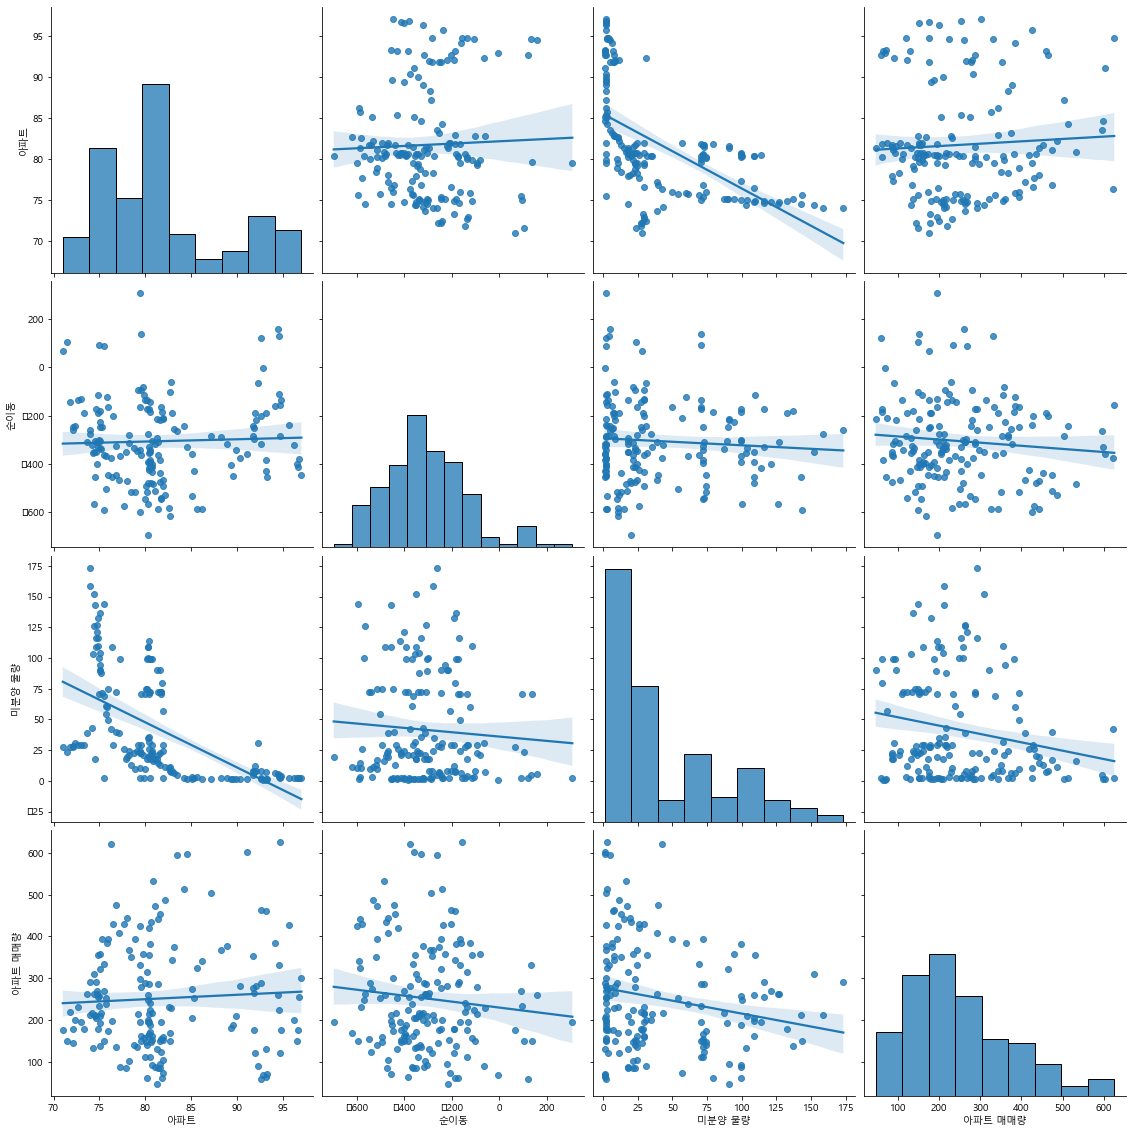

In [20]:
sns.pairplot(df1, vars = ['아파트', '순이동', '미분양 물량', '아파트 매매량'],
             height = 4, kind = 'reg')

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


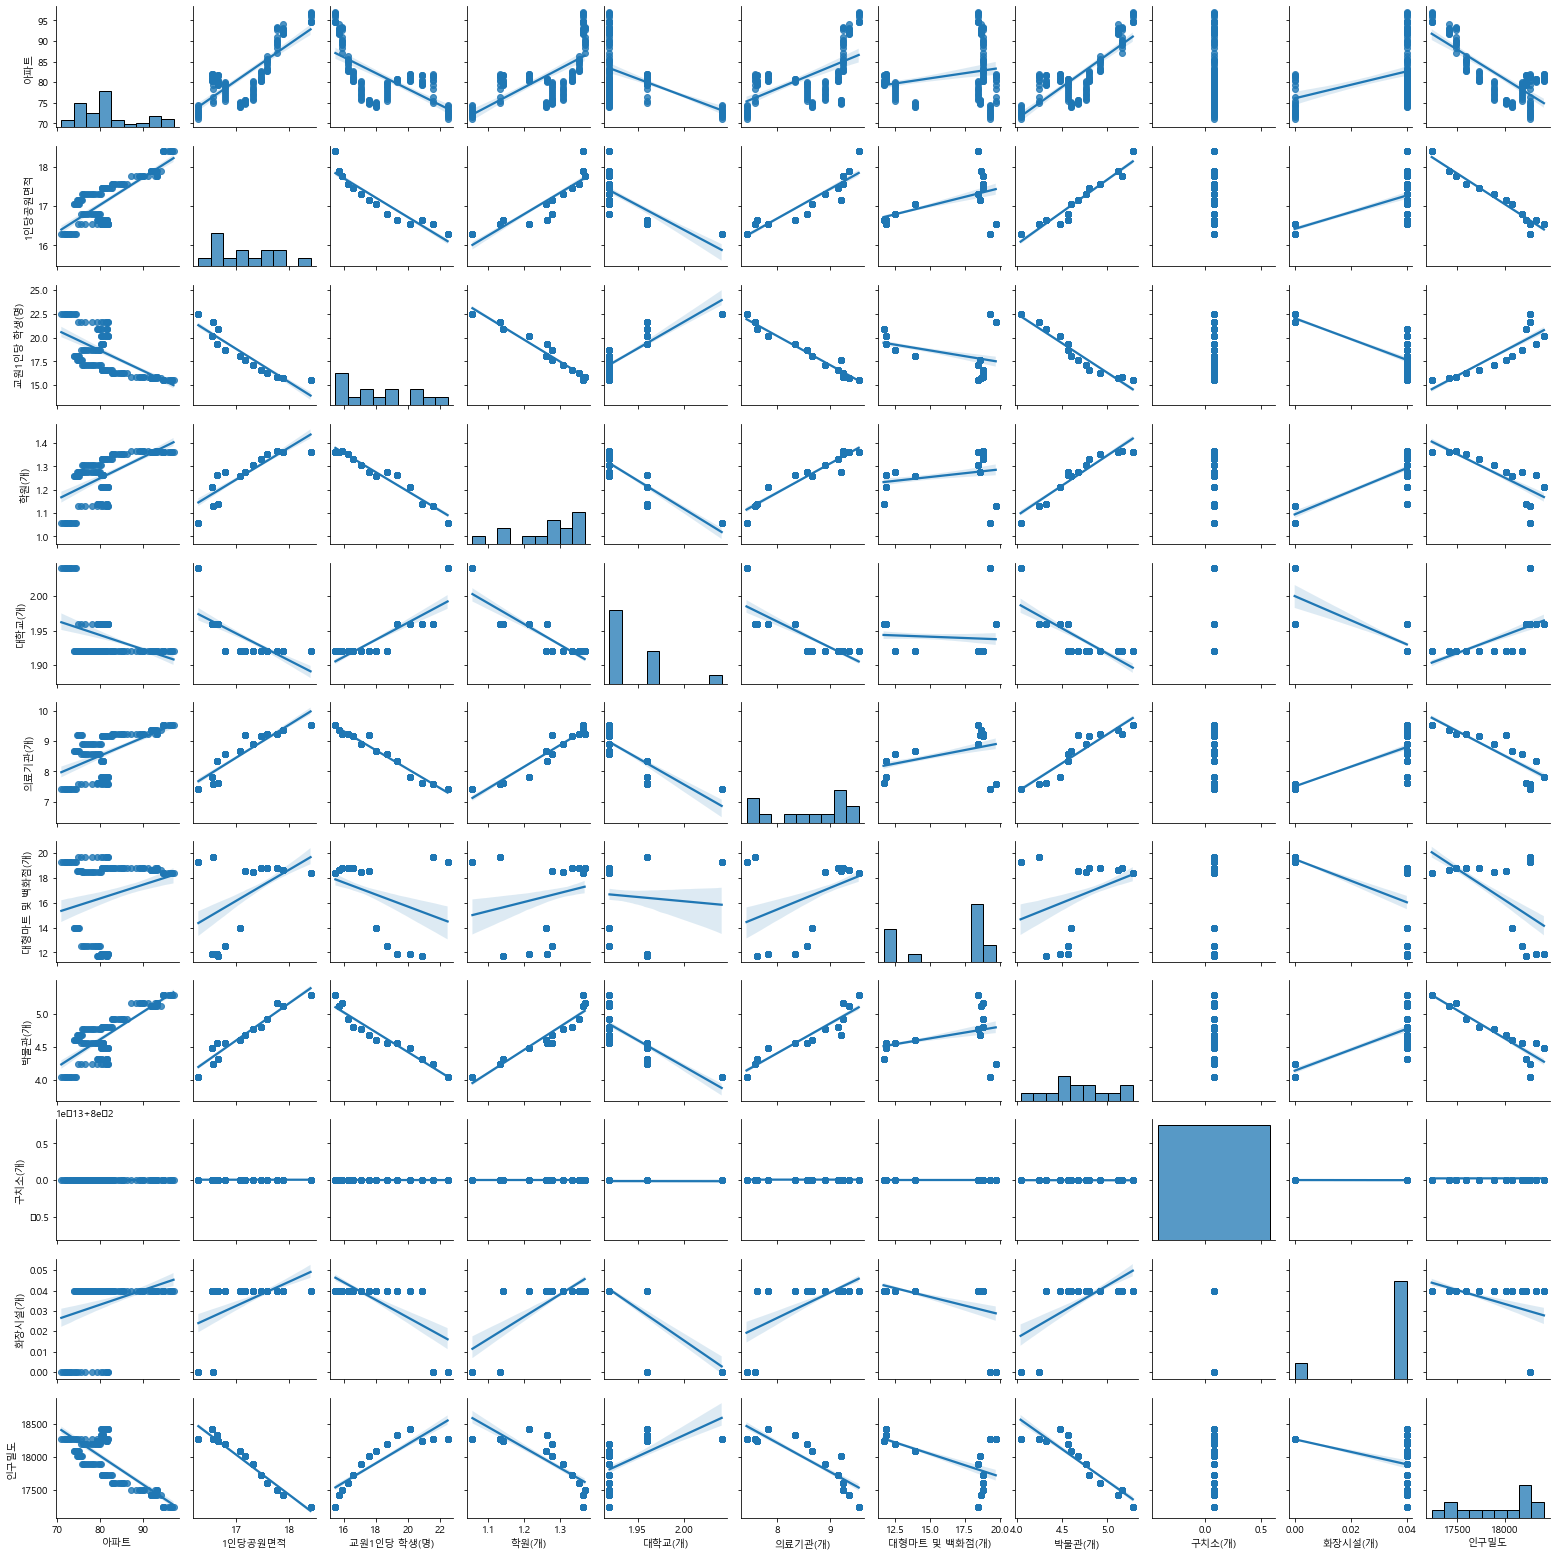

In [22]:
sns.pairplot(df1, vars = ['아파트', '1인당공원면적', '교원1인당 학생(명)', '학원(개)',
                         '대학교(개)', '의료기관(개)', '대형마트 및 백화점(개)', '박물관(개)',
                         '구치소(개)', '화장시설(개)', '인구밀도'],
             height = 2, kind = 'reg')